In [1]:
f = open(".\\Dataset_Question1\\1\\1.pgm",'rb')

Realized that the first line contained P5 followed by the dimensions. Decided to store the dimensions in a List

In [2]:
dim = []
for i in f.readline().split():
    try:
        dim.append(int(i))
    except:
        continue
print(dim)

[64, 64, 255]


In [3]:
import numpy as np
img_matrix = np.ndarray(shape = (dim[1],dim[0]),dtype='int32')
for x in range(dim[1]):
    for y in range(dim[0]):
        img_matrix[x,y] = (ord(f.read(1)))
print(img_matrix)

[[48 46 47 ... 53 55 53]
 [47 45 49 ... 48 49 50]
 [46 47 48 ... 37 46 51]
 ...
 [48 48 49 ... 47 45 48]
 [48 49 48 ... 45 46 46]
 [50 51 47 ... 44 47 46]]


In [ ]:
#display the image
import matplotlib.pyplot as plt
plt.imshow(img_matrix,cmap='Gray')

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def read_pgm(path,img_matrix):
    f = open(path,'rb')
    dim = []
    for i in f.readline().split():
        try:
            dim.append(int(i))
        except:
            continue
    img_matrix = np.ndarray(shape = (dim[1],dim[0]),dtype='int32')
    for x in range(dim[1]):
        for y in range(dim[0]):
            img_matrix[x,y] = (ord(f.read(1)))
    return img_matrix

In [6]:
matrix1 = np.ndarray(shape = (1,1),dtype='int32')
matrix1 = read_pgm(".\\Dataset_Question1\\1\\1.pgm",matrix1)

In [ ]:
matrix1

In [ ]:
u, s, vh = np.linalg.svd(matrix1, full_matrices=True)

In [ ]:
u

In [ ]:
s.shape

In [ ]:
vh

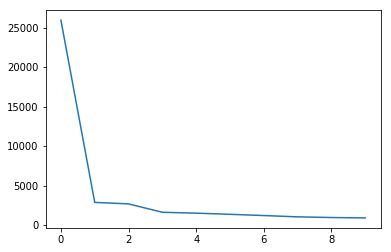

In [30]:
plt.plot(s)

So only 1-3 singular values actually matter to reconstruct the matrix, we can consider the rest to be just noise.

In [ ]:
total = np.sum(s)
turn_pt = 0
i = 0
while turn_pt <= 0.94*total:
    turn_pt = turn_pt + s[i]
    i += 1
i

In [ ]:
stopping_point = i + 1

In [ ]:
reduced_matrix = np.zeros(shape = (64,64),dtype='float32') 
for i in range(21):
    for j in range(64):
        for k in range(64):
            reduced_matrix[j,k] = reduced_matrix[j,k] + (s[i])*u[j,i]*(vh[i,k])
print(reduced_matrix.shape)
reduced_matrix

In [ ]:
plt.imshow(reduced_matrix,cmap='gray')

In [ ]:
# plot images with different number of components
comps = [1, 5, 10, 15, 20, 25 ]

plt.figure(figsize = (16, 8))
for i in range(6):
    low_rank = u[:, :comps[i]] @ np.diag(s[:comps[i]]) @ vh[:comps[i], :]
    plt.subplot(2, 3, i+1), plt.imshow(low_rank, cmap = 'gray'), plt.axis('off'), plt.title("n_components =" + str(comps[i]))

Decomposing and Reconstructing the matrix using fewer components

In [4]:
def matrix_reduction(img_matrix):
    u, s, vh = np.linalg.svd(img_matrix)
    total = sum(s)
    partial_sum = 0
    i = 0
    while partial_sum < 0.75*total:
        partial_sum += s[i]
        i += 1
    elbow = i
    reduced_matrix = np.ndarray(shape = (64,64), dtype = 'float32')
    reduced_matrix = u[:,:elbow+1] @ np.diag(s[:elbow+1]) @vh[:elbow+1,:] 
    return elbow, reduced_matrix

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(5,2,1)
for i in range(10):
    matrix = np.ndarray(shape=(0,0), dtype = 'float32')
    matrix = read_pgm('.\\Dataset_Question1\\1\\'+str(i+1)+'.pgm',matrix)
    plt.subplot(5,2,i+1)

<b> Forming the Representative image </b>

In [ ]:
matrix = read_pgm('.\\Dataset_Question1\\7\\1.pgm',matrix)
matrix

In [7]:
def unroll(img):
    img=img.reshape(img.shape[0]*img.shape[1],1)
    img=np.transpose(img)
    return img
matrix=np.zeros(shape = (3,2))
print(unroll(matrix))

[[0. 0. 0. 0. 0. 0.]]


In [27]:
rep_images = np.zeros(shape=(15,64,64),dtype='float32')
no_comps = np.zeros(shape=(15,1),dtype='int32')
unrolled_images = np.zeros(shape = (4096,10))
for img_id in range (15):
    for i in range(10):
        rep_image = np.zeros(shape=(64,64), dtype = 'float32')
        matrix = np.ndarray(shape=(64,64), dtype = 'float32')
        matrix = read_pgm('.\\Dataset_Question1\\'+str(img_id + 1)+'\\'+str(i+1)+'.pgm',matrix)
        unrolled_images[:,i] = unroll(matrix)
    no_comps[img_id],reduced_matrix = matrix_reduction(unrolled_images)
    weightages = np.asarray([0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1])
    rep_images[img_id] = np.matmul(reduced_matrix,weightages).reshape(64,64)

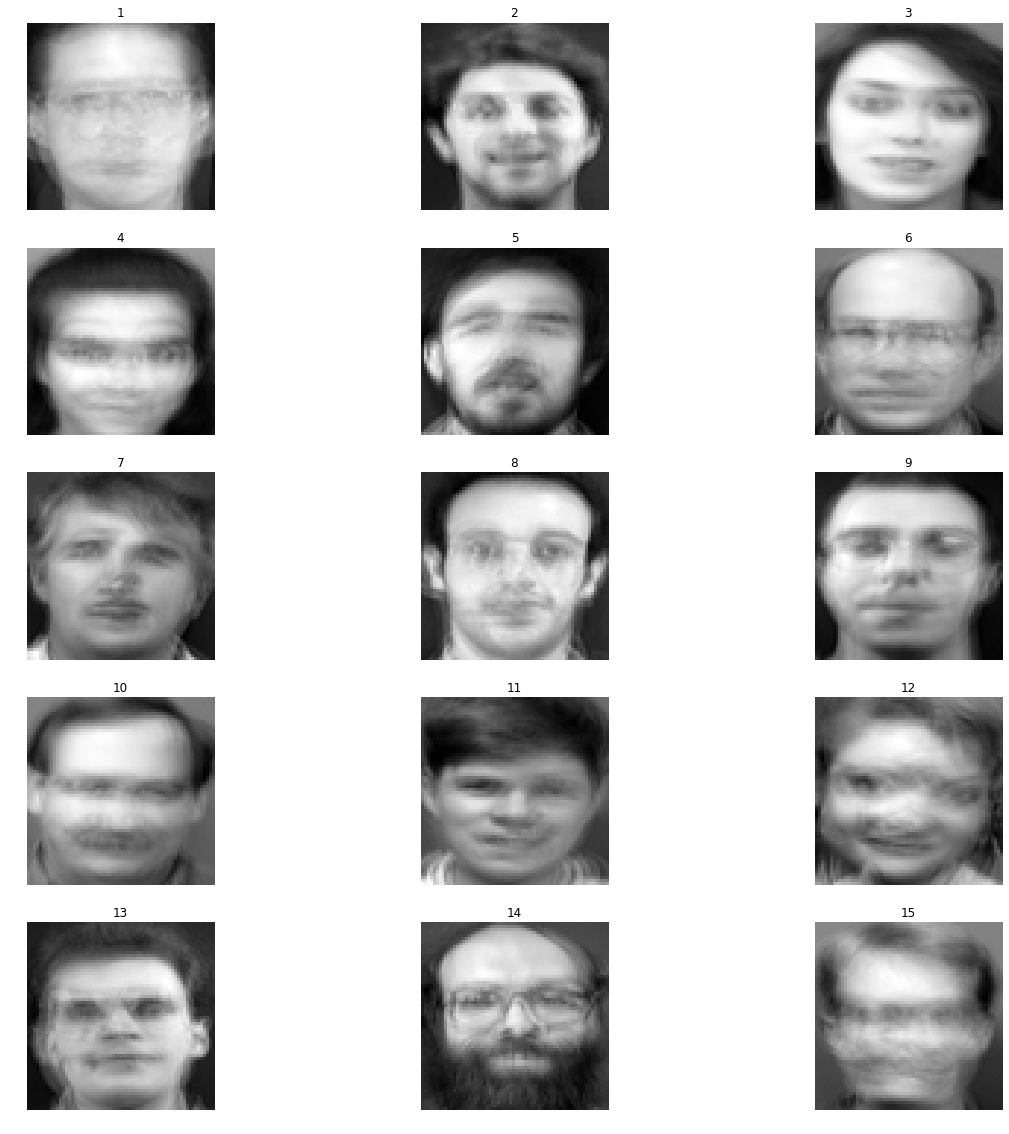

In [37]:
plt.figure(figsize = (20,20))
for i in range(15):
    plt.subplot(5,3,i+1)
    plt.axis('off')
    plt.title(i+1)
    plt.imshow(rep_images[i],cmap='gray')

In [13]:
img_wise_correct = 0
accuracies = []
correct_predictions = 0
for i in range(15):
    img_wise_correct = 0
    for j in range(10):
        matrix = np.ndarray(shape=(64,64), dtype = 'float32')
        matrix = read_pgm('.\\Dataset_Question1\\'+str(i + 1)+'\\'+str(j+1)+'.pgm',matrix)
        match = 1
        #image_distance = np.linalg.norm(matrix-rep_images[0],1)
        minimum = np.linalg.norm(matrix-rep_images[0],1)
        #minimum = 10**9
        for img_id in range(15):
            image_distance = np.linalg.norm(matrix-rep_images[img_id],1)
            if minimum > image_distance:
                match = img_id + 1
                minimum = image_distance
        if match == i + 1:
            img_wise_correct += 1
            correct_predictions += 1
        #print(match)
    accuracies.append(img_wise_correct)
accuracy = (correct_predictions/150)*100
print("Accuracy ={}",accuracy)

Accuracy =
93.33333333333333


[7, 10, 10, 10, 9, 10, 10, 9, 9, 10, 9, 10, 8, 9, 10]


<BarContainer object of 15 artists>

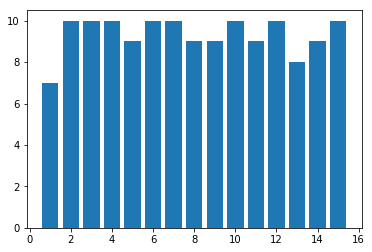

In [26]:
print(accuracies)
plt.bar(np.linspace(1,15,num=15),accuracies)

In [28]:
u,s,vh = np.linalg.svd(unrolled_images)

In [29]:
u.shape

(4096, 4096)

In [ ]:
matrix


In [ ]:
rep_images[14]

In [33]:
for i in range(10):
    rep_image = np.zeros(shape=(64,64), dtype = 'float32')
    matrix = np.ndarray(shape=(64,64), dtype = 'float32')
    matrix = read_pgm('.\\Dataset_Question1\\'+str(1)+'\\'+str(i+1)+'.pgm',matrix)
    unrolled_images[:,i] = unroll(matrix)

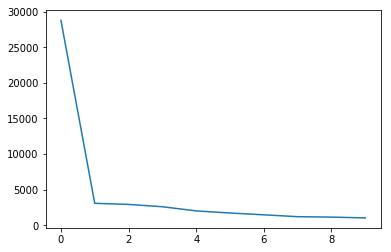

In [34]:
u,s,vh = np.linalg.svd(unrolled_images)
plt.plot(s)

In [29]:
no_comps

array([[3],
       [3],
       [2],
       [4],
       [3],
       [2],
       [2],
       [3],
       [3],
       [2],
       [3],
       [3],
       [3],
       [3],
       [3]])

Number of components is highest for the <b>4th</b> image

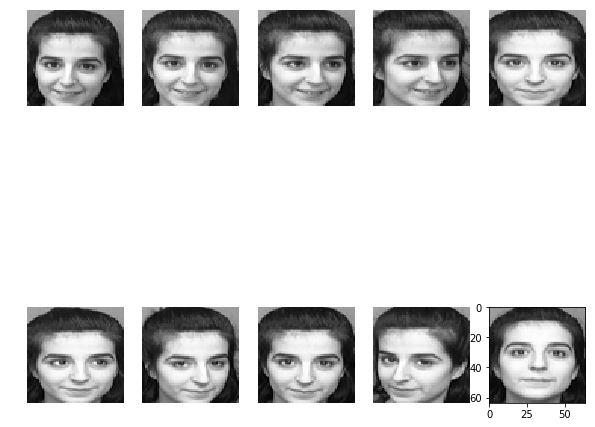

In [9]:
plt.figure(figsize=(10,10))
for i in range(10):
    matrix = np.ndarray(shape=(64,64), dtype = 'float32')
    matrix = read_pgm('.\\Dataset_Question1\\4\\'+str(i+1)+'.pgm',matrix)
    plt.axis('off')
    plt.subplot(2,5,i+1)
    plt.imshow(matrix,cmap='gray')

Although we can't see anything obvious in the images, the SVD tells us that this image has a lot of charecterstic features which are given almost equal weghtage, that is why to get to 90% we have to take upto 4 components

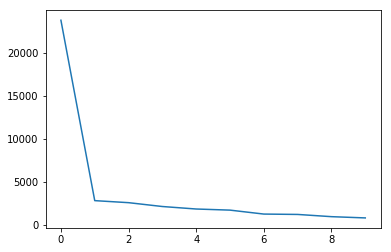

In [44]:
chk = np.zeros(shape=(4096,10))
for i in range(10):
    rep_image = np.zeros(shape=(64,64), dtype = 'float32')
    matrix = np.ndarray(shape=(64,64), dtype = 'float32')
    matrix = read_pgm('.\\Dataset_Question1\\'+str(4)+'\\'+str(i+1)+'.pgm',matrix)
    chk[:,i] = unroll(matrix)
u,s,vh = np.linalg.svd(chk)
plt.plot(s)